# **PRUEBA TÉCNICA PROTECCIÓN**

### *PUNTO 3: Optimización*


Dado un número de puntos en un plano, tu tarea es encontrar los dos que tengan la menor distancia entre ellas en un tiempo O(n log n) linealitmico.

Ejemplo:
Para el siguiente plano

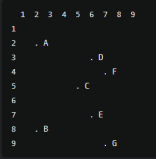

El resultado sería:

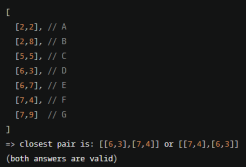


***
***

**Presentado por:** Nathalia Moreno Sánchez


### **Algoritmo**:

**Dividir y Conquistar:**

* **Dividir:** Dividir el conjunto de puntos en dos subconjuntos de tamaño aproximadamente igual, de forma recursiva.
* **Conquistar:** En cada subconjunto, encontramos la pareja de puntos con la distancia mínima utilizando la fuerza bruta (comparando cada par de puntos).
* **Combinar:** Comparar la distancia mínima entre las parejas de puntos encontradas en los subconjuntos con la distancia mínima entre un punto de un subconjunto y otro punto del otro subconjunto. La pareja de puntos con la distancia mínima global será la que tenga la menor distancia entre todas las comparaciones.

Ejemplo:
* Dividimos el plano en dos subconjuntos: {A, B, C, D} y {E, F, G}.
* En cada subconjunto, encontramos la pareja de puntos con la distancia mínima
* Comparamos la distancia mínima entre las parejas de puntos de los subconjuntos.

In [1]:
import time
import math

# La distancia euclidiana entre ellos es la longitud de la línea recta que los une.

def distancia_euclideana(point1, point2):
    """
    Esta función calcula la distancia euclidiana entre dos puntos en un plano 2D utilizando el teorema de Pitágoras

    Parámetros:
    Dados dos puntos (x1, y1) y (x2, y2)

    Retorno:
    None
    """
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def buscar_puntos_mas_cercanos(points):
    """
    Esta función ordenar los puntos según sus coordenadas x

    Parámetros:
    conjuntos_puntos: Una lista de listas de tuplas que representan las coordenadas de los puntos.

    Retorno:
    Los resultados de la función divide_and_conquer(points)
    """
    points.sort()

    def divide_and_conquer(points):
        """
        Esta función recursiva implementa el algoritmo de dividir y conquistar

        Parámetros:
        conjuntos_puntos: Una lista de listas de tuplas que representan las coordenadas de los puntos.
        # Si el número de puntos es menor a 3 Fuerza bruta
        # Si es mayor a 3 puntos divide en dos mitades y se selecciona el par con la distancia mínima
        # Se divide el conjunto de puntos en dos mitades y se llama recursivamente a la función divide_and_conquer para cada mitad
        # Se crea una franja de puntos alrededor de la línea vertical que divide las dos mitades
        # Esta franja contiene puntos cuya distancia en el eje x desde el punto medio es menor que la distancia mínima encontrada hasta ahora.

        Retorno:
        closest_pair (Par mas cercano), min_distance (distancia mínima)
        """
        num_points = len(points)

        if num_points <= 3: # Si puntos menor a 3 Fuerza bruta
            min_distance = float('inf')
            closest_points = None
            for i in range(num_points):
                for j in range(i+1, num_points):
                    distance = distancia_euclideana(points[i], points[j])
                    if distance < min_distance:
                        min_distance = distance
                        closest_points = (points[i], points[j])
            return closest_points, min_distance
        # Si es mayor a 3 puntos divide en dos mitades y se selecciona el par con la distancia mínima
        mid = num_points // 2
        mid_point = points[mid][0]

        left_points = points[:mid]
        right_points = points[mid:]

        # Si hay más de 3 puntos, se divide el conjunto de puntos en dos mitades y se llama recursivamente a la función divide_and_conquer para cada mitad.
        closest_left, min_dist_left = divide_and_conquer(left_points)
        closest_right, min_dist_right = divide_and_conquer(right_points)

        if min_dist_left < min_dist_right:
            closest_pair = closest_left
            min_distance = min_dist_left
        else:
            closest_pair = closest_right
            min_distance = min_dist_right
        # se crea una franja de puntos alrededor de la línea vertical que divide las dos mitades.
        # Esta franja contiene puntos cuya distancia en el eje x desde el punto medio es menor que la distancia mínima encontrada hasta ahora.
        strip = [point for point in points if abs(point[0] - mid_point) < min_distance]
        strip.sort(key=lambda x: x[1])

        for i in range(len(strip)):
            j = i + 1
            while j < len(strip) and strip[j][1] - strip[i][1] < min_distance:
                distance = distancia_euclideana(strip[i], strip[j])
                if distance < min_distance:
                    min_distance = distance
                    closest_pair = (strip[i], strip[j])
                j += 1

        return closest_pair, min_distance

    return divide_and_conquer(points)


In [15]:
def probar_codigo(conjuntos_puntos):
  """
  Prueba el código para encontrar los puntos más cercanos con varios conjuntos de puntos.

  Parámetros:
    conjuntos_puntos: Una lista de listas de tuplas que representan las coordenadas de los puntos.

  Retorno:
    None
  """

  for puntos in conjuntos_puntos:
    print(f"\nConjunto de puntos en tuplas: {puntos}")
    start = time.perf_counter()
    closest_points, min_distance = buscar_puntos_mas_cercanos(puntos)
    fin = time.perf_counter()
    tiempo_transcurrido = (fin - start) * 1000
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.4f} milisegundos")
    if closest_points:
      print(f"Los dos puntos más cercanos son: {closest_points}")
      print(f"La distancia entre los puntos es: {min_distance}")
    else:
      print("No hay suficientes puntos para calcular las distancias.")

#Ejemplo de uso:

conjuntos_puntos = [
  [(2, 2), (2, 8), (5, 5), (6, 3), (6, 7), (7, 4), (7, 9)],
  [(1, 2), (2, 9), (5, 4), (4, 3), (9, 7), (5, 1), (3, 7), (2, 5), (5, 9)],
  [(0, 0), (1, 0), (0, 1)],
]

probar_codigo(conjuntos_puntos)



Conjunto de puntos en tuplas: [(2, 2), (2, 8), (5, 5), (6, 3), (6, 7), (7, 4), (7, 9)]
Tiempo de ejecución: 0.0425 milisegundos
Los dos puntos más cercanos son: ((6, 3), (7, 4))
La distancia entre los puntos es: 1.4142135623730951

Conjunto de puntos en tuplas: [(1, 2), (2, 9), (5, 4), (4, 3), (9, 7), (5, 1), (3, 7), (2, 5), (5, 9)]
Tiempo de ejecución: 0.0688 milisegundos
Los dos puntos más cercanos son: ((4, 3), (5, 4))
La distancia entre los puntos es: 1.4142135623730951

Conjunto de puntos en tuplas: [(0, 0), (1, 0), (0, 1)]
Tiempo de ejecución: 0.0072 milisegundos
Los dos puntos más cercanos son: ((0, 0), (0, 1))
La distancia entre los puntos es: 1.0
